# New York City Parking Ticket Analysis

In [321]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##### Preparation: Raw_data loading

In [503]:
filename = "Parking_Violations_Issued_-_Fiscal_Year_2015.csv"

In [504]:
print("loading data --- ", filename, "...")
raw_data = pd.read_csv(filename, low_memory = False)
print("done!")

loading data ---  Parking_Violations_Issued_-_Fiscal_Year_2015.csv ...
done!


In [505]:
start_date = '2014-07-01'
end_date = '2015-06-30'

In [506]:
raw_data.head(3)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,8002531292,EPC5238,NY,PAS,10/01/2014,21,SUBN,CHEVR,T,20390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8015318440,5298MD,NY,COM,03/06/2015,14,VAN,FRUEH,T,27790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7611181981,FYW2775,NY,PAS,07/28/2014,46,SUBN,SUBAR,T,8130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Distribution of parking tickets issued over the fiscal year.

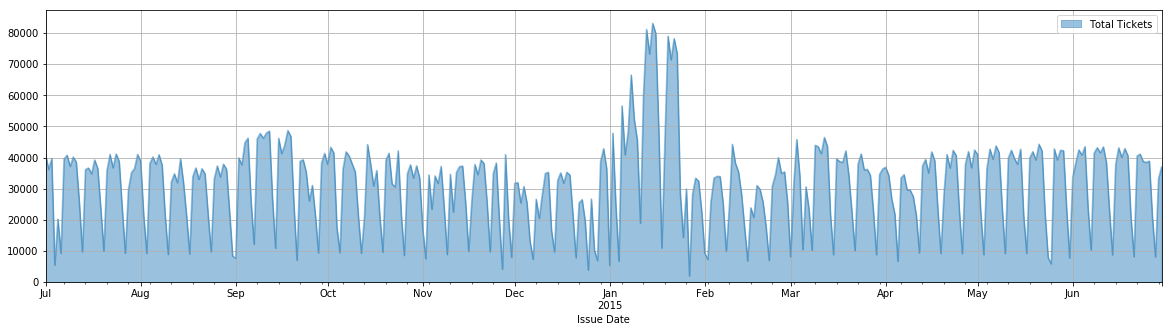

In [507]:
# Select the Columns with 'Issue Date' and 'Summons Number'
Date_SNum = raw_data[['Issue Date','Summons Number']]

# group the data by dates and count the total number of issued tickets on that date
Date_SNum = Date_SNum.groupby('Issue Date', as_index = False).count()

#Grouped data preview
Date_SNum['Issue Date'] = pd.to_datetime(Date_SNum['Issue Date'])

Date_SNum = Date_SNum.set_index('Issue Date')

#Select the tickets issued inside the fisical year range
Date_SNum = Date_SNum.loc[start_date : end_date]

#sort from start_date to end_date
Date_SNum = Date_SNum.sort_index()

#rename the Summons Number to Total Tickets, rename the dataframe too
Date_Total = Date_SNum.rename(columns = {"Summons Number" : "Total Tickets"})

fig1 = Date_Total.plot(kind = 'area', figsize = (20,5), alpha = 0.45, grid = True)

#### 2. Distribution of the traffic Tickets on the Day of Week

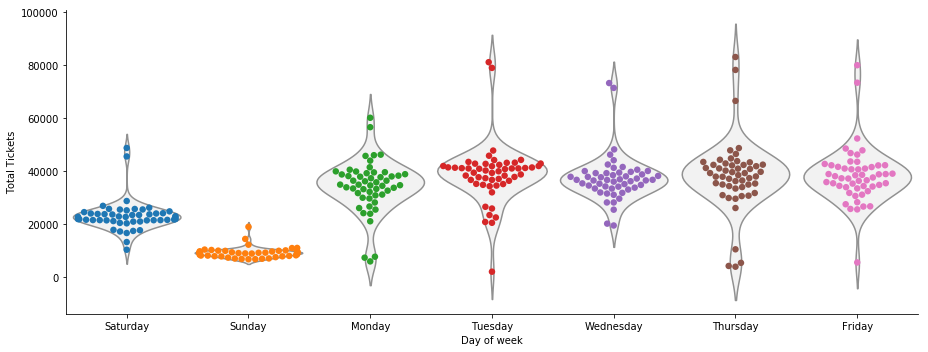

In [508]:
Date_Total["Day of week"] = Date_Total.index.day_name()

#violin plot for the number of tickets gave out on each weekday
fig2 = sns.catplot(x = "Day of week", y = "Total Tickets", data = Date_Total, kind = "violin", height = 5, width = 0.9, aspect = 13/5, order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], scale = "count", inner = None, color = "0.95")
fig2 = sns.swarmplot(x = "Day of week", y = "Total Tickets", data = Date_Total, order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], size = 6.5)

#### 3. Distribution of the traffic Tickets on the different month

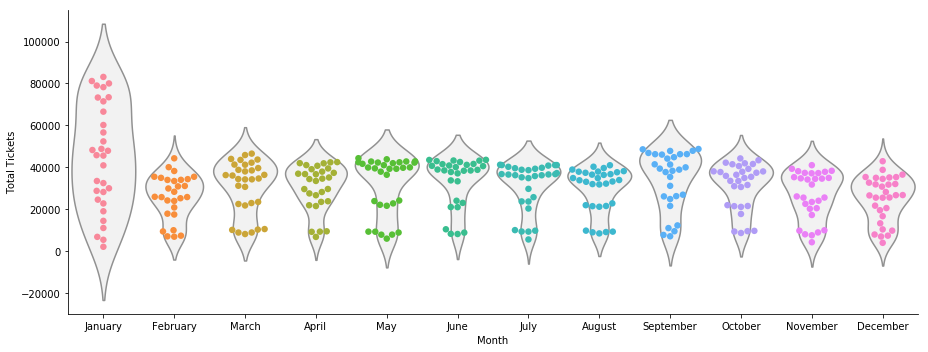

In [509]:
Date_Total["Month"] = Date_Total.index.month_name()

#violin plot for the number of tickets gave out on each weekday
fig3 = sns.catplot(x = "Month", y = "Total Tickets", data = Date_Total, kind = "violin", height = 5, width = 0.9, aspect = 13/5, order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], scale = "count", inner = None, color = "0.95")
fig3 = sns.swarmplot(x = "Month", y = "Total Tickets", data = Date_Total, order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], size = 6.5)

#### 4. Tickets given on Plate Types

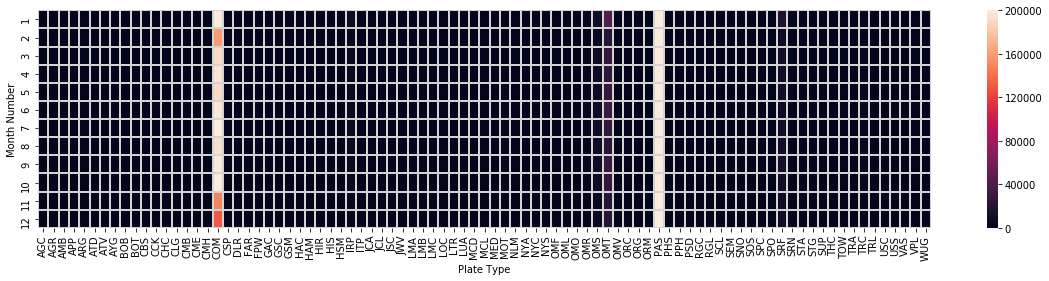

In [510]:
Date_PT_TotalTX = raw_data[['Issue Date','Plate Type','Summons Number']]
# Fill any N/A with number string "N/A"
Date_PT_TotalTX = Date_PT_TotalTX.fillna("not_valid") 

Date_PT_TotalTX = Date_PT_TotalTX.groupby(['Issue Date','Plate Type'], as_index = False).count()

Date_PT_TotalTX['Issue Date'] = pd.to_datetime(Date_PT_TotalTX['Issue Date'])

Date_PT_TotalTX = Date_PT_TotalTX.set_index('Issue Date')
#Select the tickets issued inside the fisical year range
Date_PT_TotalTX = Date_PT_TotalTX.loc[start_date:end_date]
#drop the rows with plate type 999
Date_PT_TotalTX = Date_PT_TotalTX.loc[Date_PT_TotalTX['Plate Type'] != '999']

Date_PT_TotalTX['Month Number'] = Date_PT_TotalTX.index.month

Date_PT_TotalTX = Date_PT_TotalTX.groupby(['Month Number','Plate Type']).sum()

Date_PT_TotalTX = Date_PT_TotalTX.reset_index()

Date_PT_TotalTX = Date_PT_TotalTX.pivot(index='Month Number', columns='Plate Type', values='Summons Number')

Date_PT_TotalTX = Date_PT_TotalTX.fillna(0)

plt.subplots(figsize=(20,4)) 
fig4 = sns.heatmap(Date_PT_TotalTX, vmax = 200000, linewidths = 1, linecolor = 'lightgray')

#### 4. violation code with Plate Types

In [601]:
Date_VCode_PT_TotalTX = raw_data[['Issue Date','Violation Code','Plate Type','Summons Number']]

# Fill any N/A with number string "N/A"
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.fillna("not_valid") 

Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.groupby(['Issue Date','Plate Type','Violation Code'], as_index = False).count()

Date_VCode_PT_TotalTX['Issue Date'] = pd.to_datetime(Date_VCode_PT_TotalTX['Issue Date'])

Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.set_index('Issue Date')

Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.loc[start_date:end_date]

Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.loc[Date_VCode_PT_TotalTX['Plate Type'] != '999']

VCode_PT_TotalTX = Date_VCode_PT_TotalTX.groupby(['Violation Code', 'Plate Type']).sum().reset_index()

VCode_PT_TotalTX = VCode_PT_TotalTX.fillna(0)
VCode_PT_TotalTX = VCode_PT_TotalTX.rename(columns = {'Summons Number' : 'Total Tickets'})

In [602]:
VCode_PAS_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'PAS']
VCode_COM_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'COM']
VCode_OMT_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'OMT']

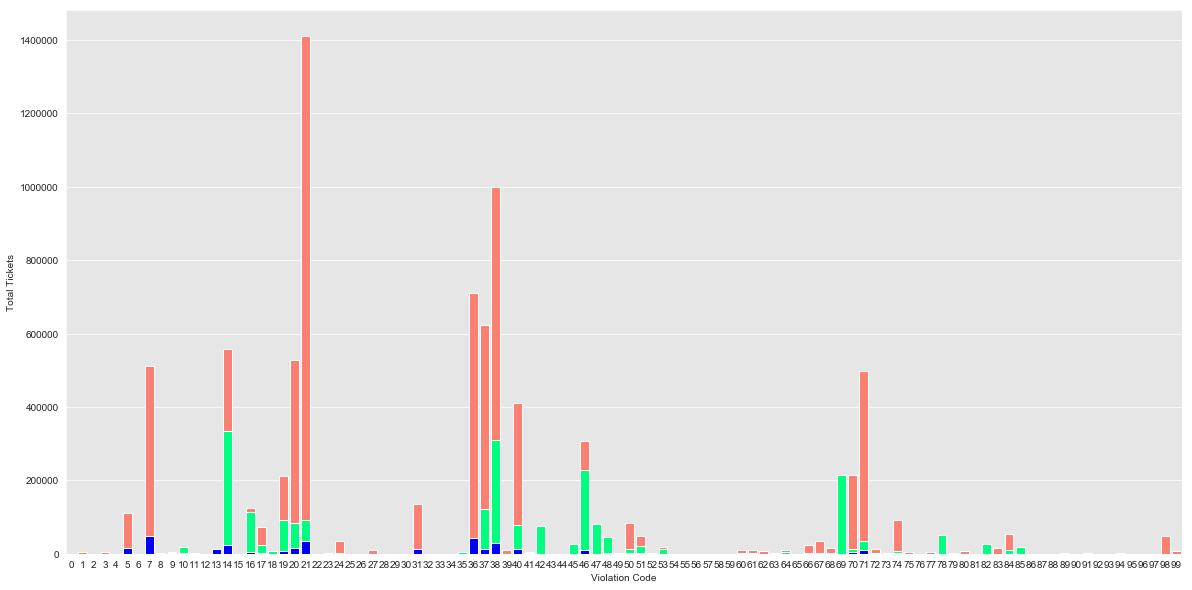

In [605]:
plt.figure(figsize = (20,10))
fig5 = sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_PAS_TotalTX, color = 'salmon', saturation = 1, order = list(range(100)))
fig5 = sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_COM_TotalTX, color = 'springgreen', saturation = 1, ax = fig5, order = list(range(100)))
fig5 = sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_OMT_TotalTX, color = 'b', saturation = 1, ax = fig5, order = list(range(100)))
fig5 = sns.set_style({"axes.facecolor": "0.9"})